In [115]:
import pandas as pd 
import tkinter as tk
from tkinter import messagebox, ttk
import pickle
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [117]:
data = pd.read_csv(r"D:\ML PROGECT\ML HEART\heart.csv" , sep = ',' , encoding = 'utf-8')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [118]:
data.shape

(918, 12)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [121]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [122]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

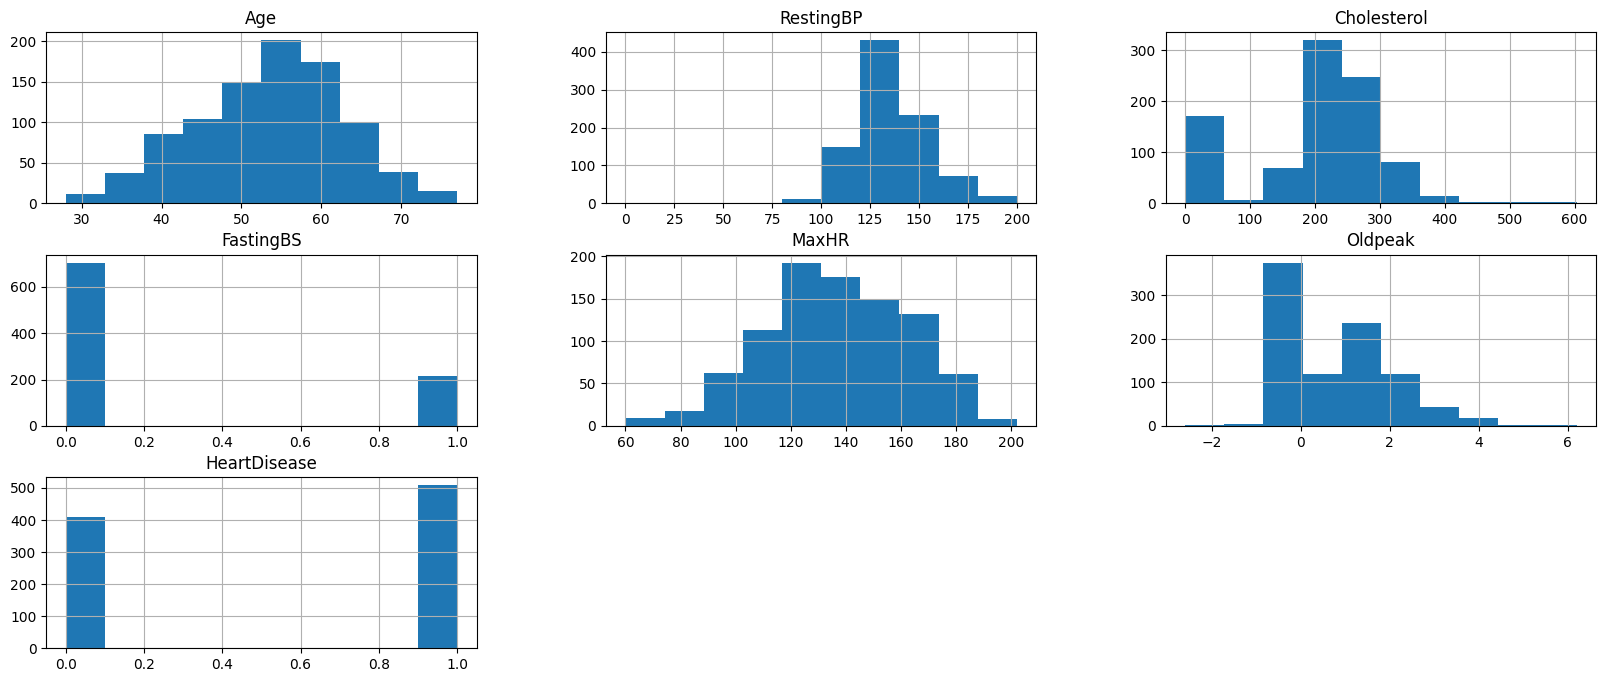

In [123]:
data.hist(figsize=(20,8))
plt.show()

In [128]:
data.columns 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [129]:
labels=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']
for label in labels :
    print(f"Value counts for {label}:\n")
    print(data[label].value_counts())
    print("-" * 40)  

Value counts for Age:

Age
54    51
58    42
55    41
56    38
57    38
52    36
62    35
59    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
40    13
69    13
66    13
37    11
35    11
68    10
74     7
70     7
34     7
36     6
32     5
71     5
72     4
75     3
29     3
31     2
33     2
77     2
76     2
30     1
28     1
73     1
Name: count, dtype: int64
----------------------------------------
Value counts for Sex:

Sex
M    725
F    193
Name: count, dtype: int64
----------------------------------------
Value counts for ChestPainType:

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
----------------------------------------
Value counts for RestingBP:

RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
101      1
117      1
192      1
129      1
164      1
Name: count, Length: 67, d

In [130]:
data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [131]:
data['Sex'] = data['Sex'].replace({'M': 1, 'F': 0},inplace=False)
data['Sex'].value_counts()

Sex
1    725
0    193
Name: count, dtype: int64

In [133]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [134]:
data['ExerciseAngina']=data['ExerciseAngina'].map({'N':1,'Y':0})
data['ExerciseAngina'].value_counts()

ExerciseAngina
1    547
0    371
Name: count, dtype: int64

In [135]:
data['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [136]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
data['RestingECG'] = lab.fit_transform(data['RestingECG'])
data['ChestPainType'] = lab.fit_transform(data['ChestPainType'])
data['ST_Slope']=lab.fit_transform(data['ST_Slope'])

In [137]:
print(data['ChestPainType'].value_counts())
print(data['RestingECG'].value_counts())
print(data['ST_Slope'].value_counts())

ChestPainType
0    496
2    203
1    173
3     46
Name: count, dtype: int64
RestingECG
1    552
0    188
2    178
Name: count, dtype: int64
ST_Slope
1    460
2    395
0     63
Name: count, dtype: int64


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [139]:
data.columns 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

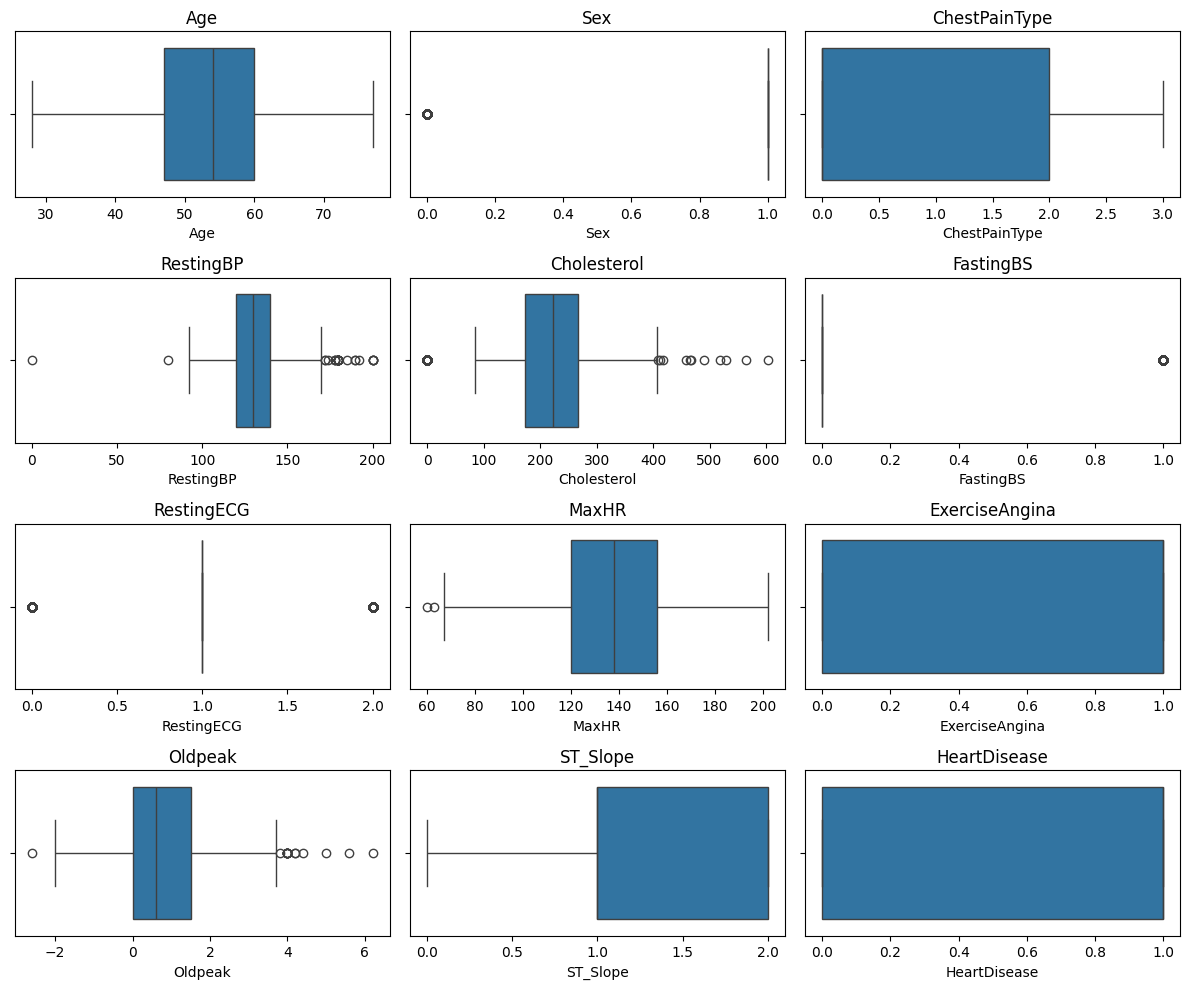

In [140]:
columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']

plt.figure(figsize=(12, 10)) 

for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i) 
    sns.boxplot(x=data[column]) 
    plt.title(column)

plt.tight_layout() 
plt.show()


In [142]:
def IQR_outlier(data, column, remove_outliers=True):
    Q1 = np.quantile(data[column], 0.25)
    Q3 = np.quantile(data[column], 0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mode = data[column].mode()[0]
    data[column] = np.where((data[column] < lower) | (data[column] > upper), mode, data[column])
    return data

In [143]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [148]:
data = IQR_outlier(data, 'Oldpeak', remove_outliers=True)
data = IQR_outlier(data, 'RestingBP', remove_outliers=True)
data = IQR_outlier(data, 'Cholesterol', remove_outliers=True)

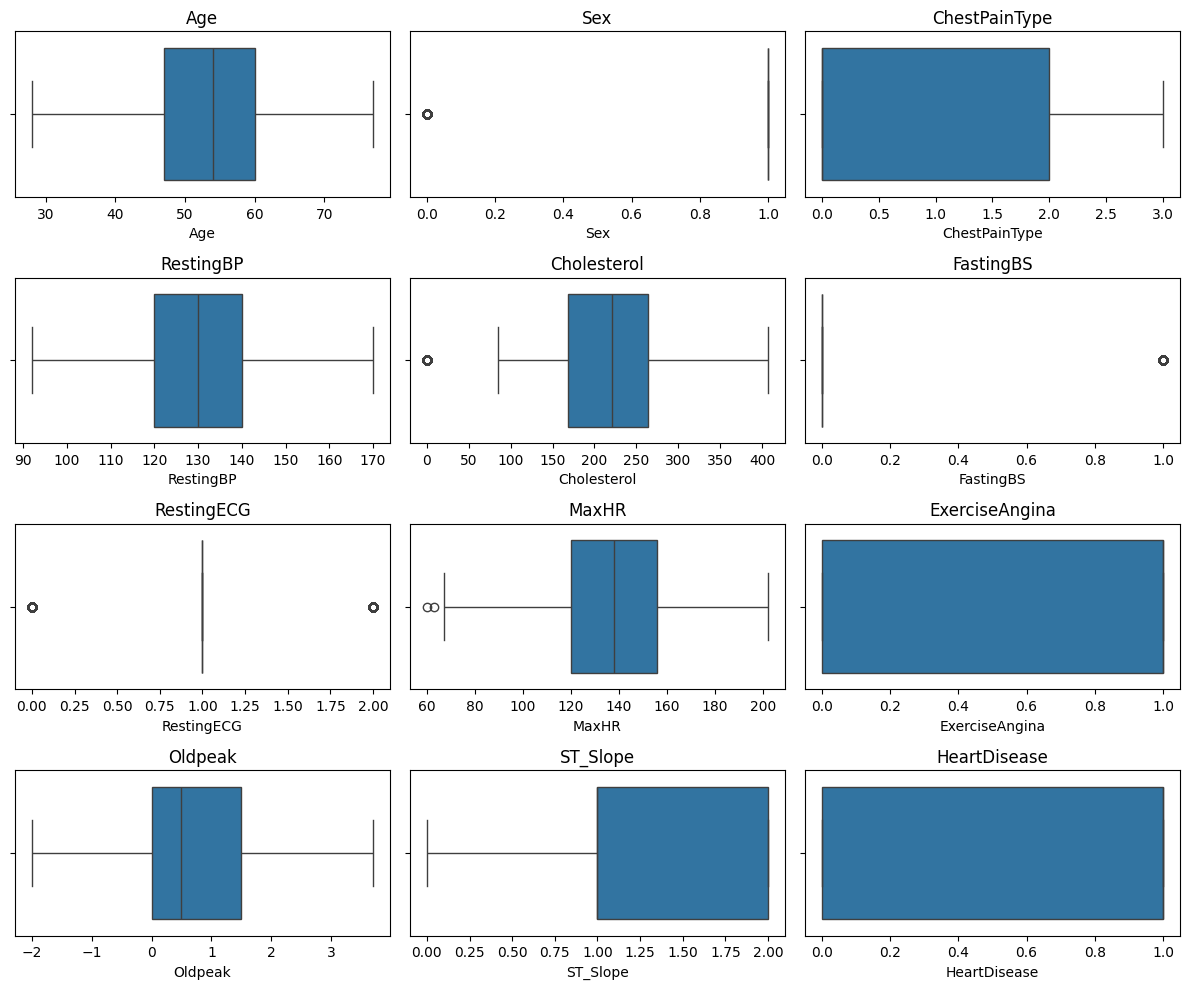

In [150]:
columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']

plt.figure(figsize=(12, 10)) 

for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i) 
    sns.boxplot(x=data[column]) 
    plt.title(column)

plt.tight_layout() 
plt.show()


In [151]:
def cap_outliers(data, column):
    Q1 = np.quantile(data[column], 0.25)
    Q3 = np.quantile(data[column], 0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data[column] = np.clip(data[column], lower, upper)
    return data

In [155]:
data = cap_outliers(data, 'MaxHR')

In [158]:
def replace_outliers_with_gaussian(data, column):
    mean_value = data[column].mean()
    std_dev = data[column].std()
    
    lower = mean_value - 3 * std_dev
    upper = mean_value + 3 * std_dev
    
    data[column] = np.where((data[column] < lower) | (data[column] > upper), mean_value, data[column])
    return data

In [159]:
data = replace_outliers_with_gaussian(data, 'Sex')

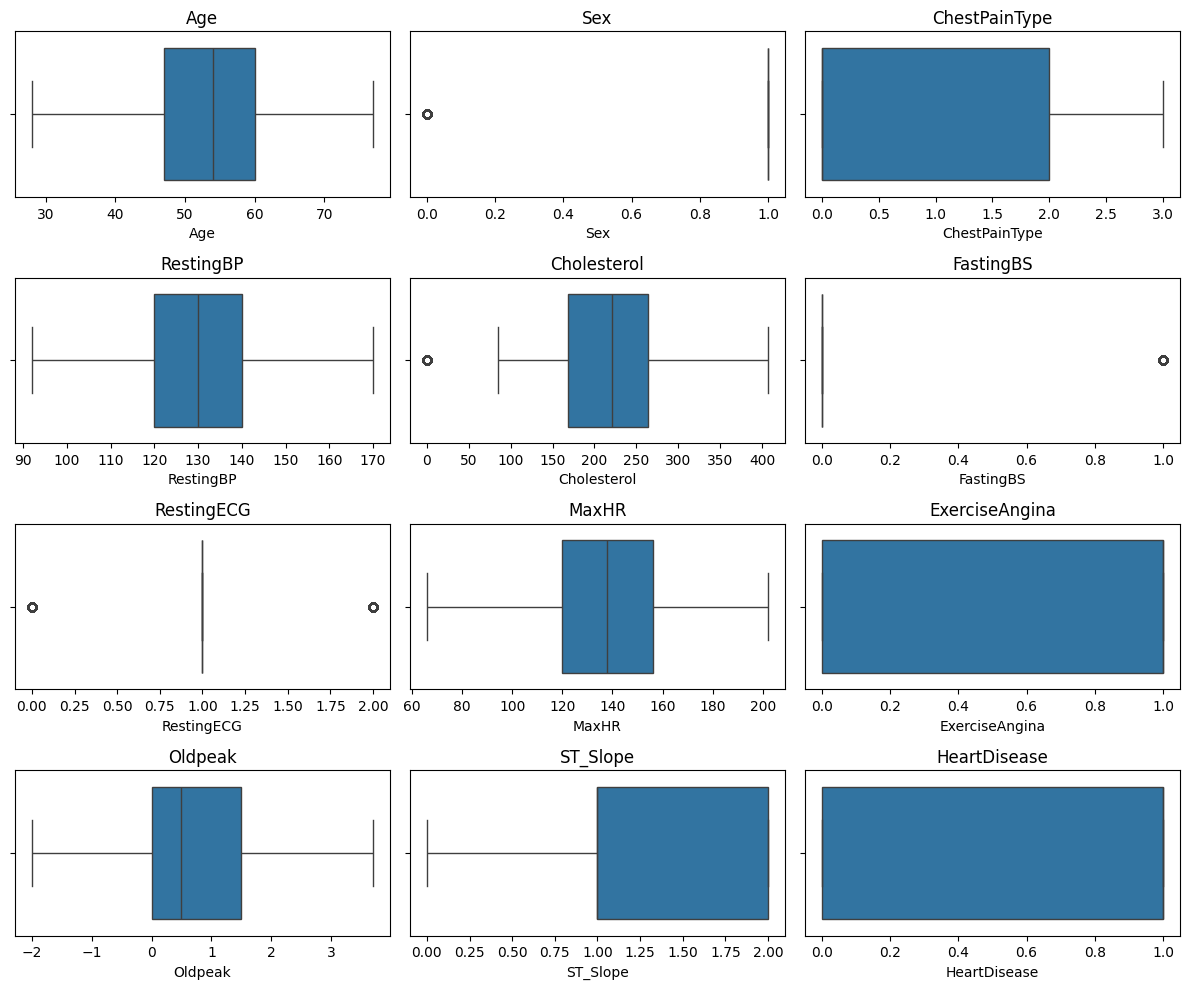

In [160]:
columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']

plt.figure(figsize=(12, 10)) 

for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i) 
    sns.boxplot(x=data[column]) 
    plt.title(column)

plt.tight_layout() 
plt.show()


In [161]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,130.774510,15.712810,92.0,120.00,130.0,140.0,170.0
Cholesterol,918.0,192.988017,106.670555,0.0,168.25,221.0,264.0,407.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.819172,25.432057,66.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.595861,0.490992,0.0,0.00,1.0,1.0,1.0
Oldpeak,918.0,0.818954,0.963720,-2.0,0.00,0.5,1.5,3.7


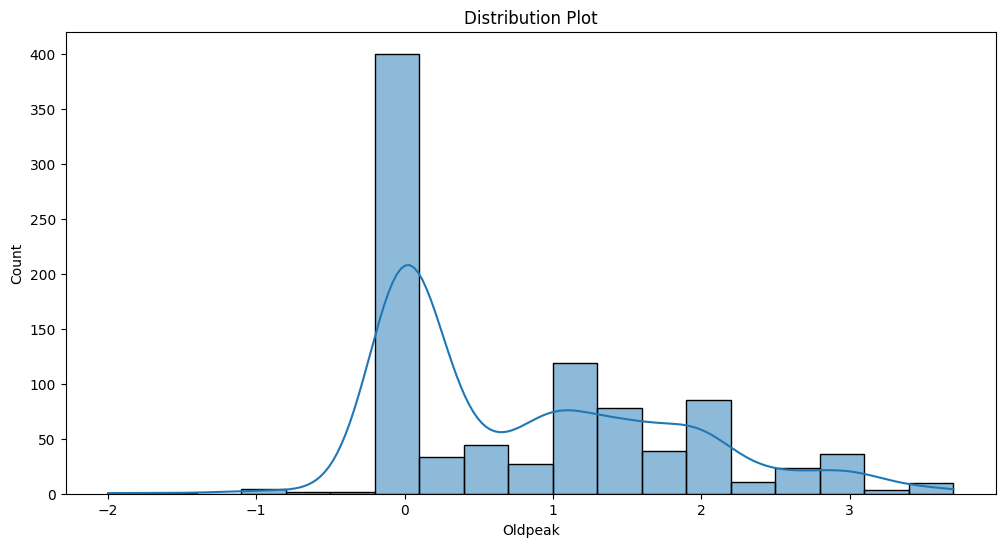

In [162]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Oldpeak'], kde=True)
plt.title("Distribution Plot")
plt.show()

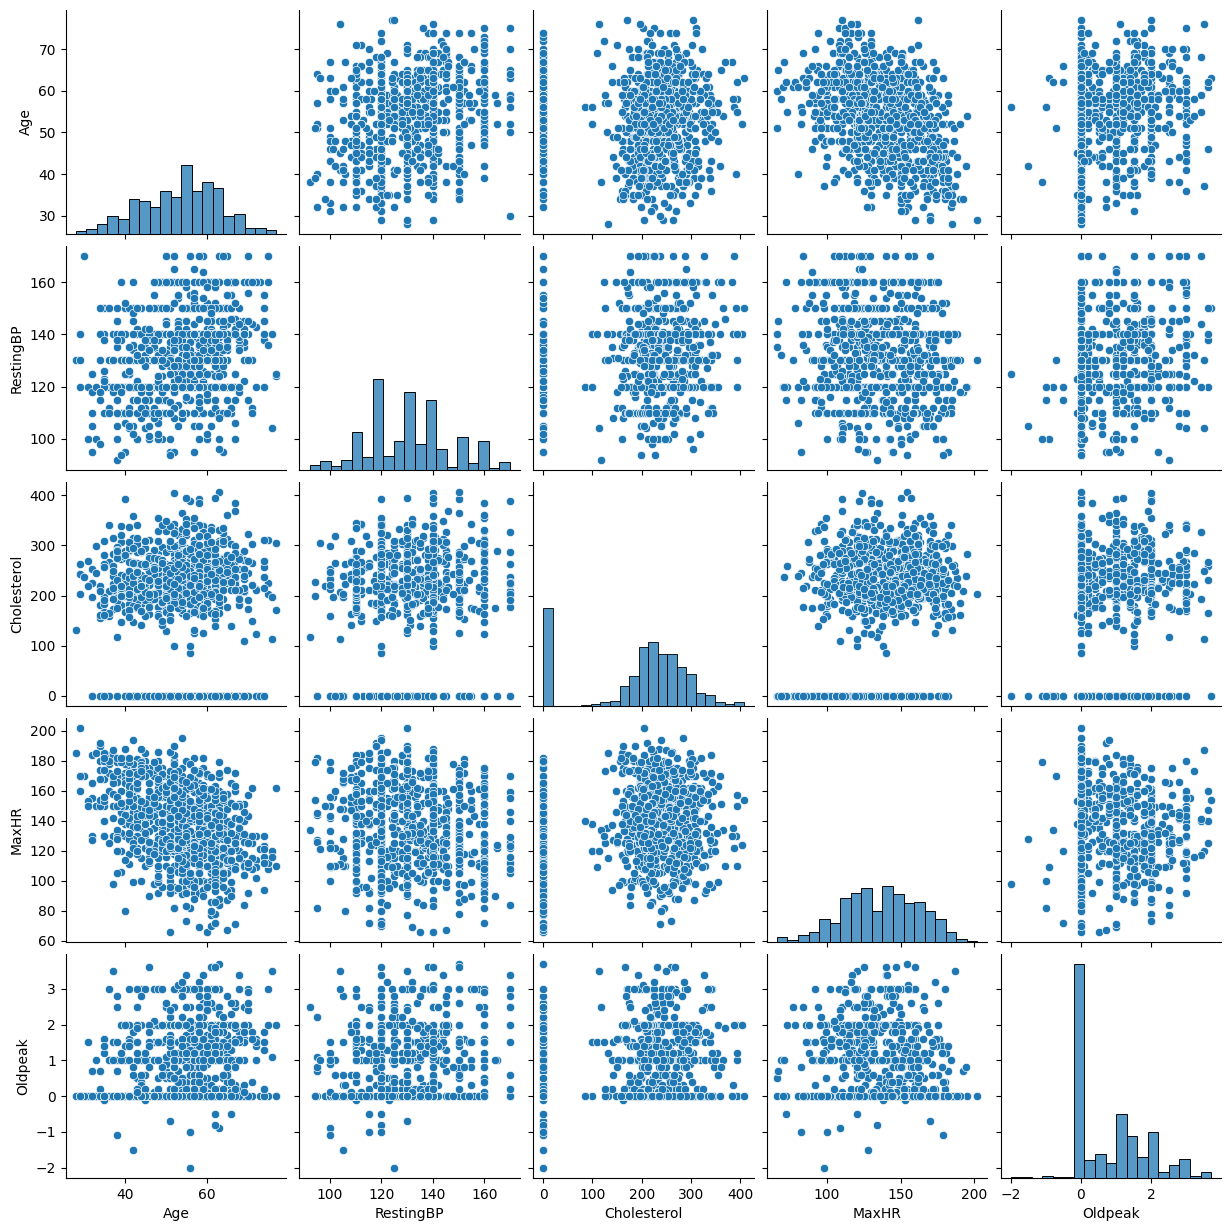

In [163]:
sns.pairplot(data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
plt.show()


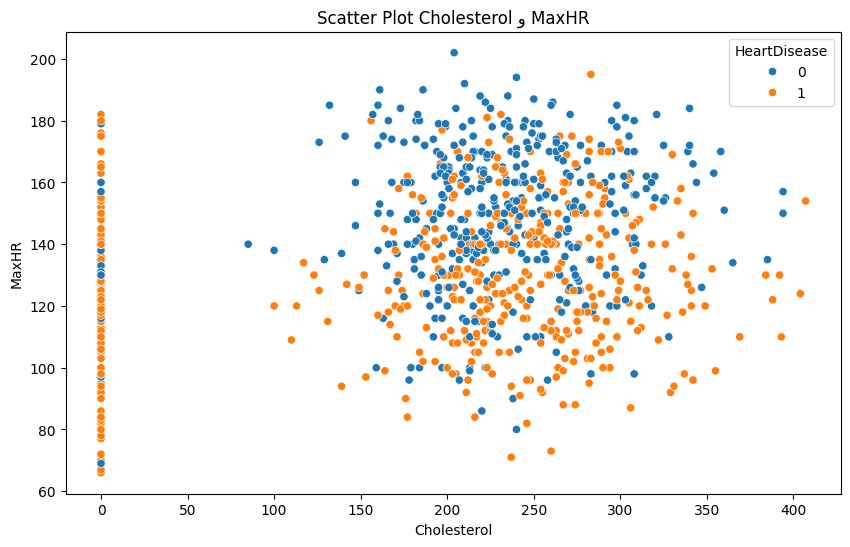

In [164]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Cholesterol'], y=data['MaxHR'], hue=data['HeartDisease'])
plt.title("Scatter Plot Cholesterol و MaxHR")
plt.show()


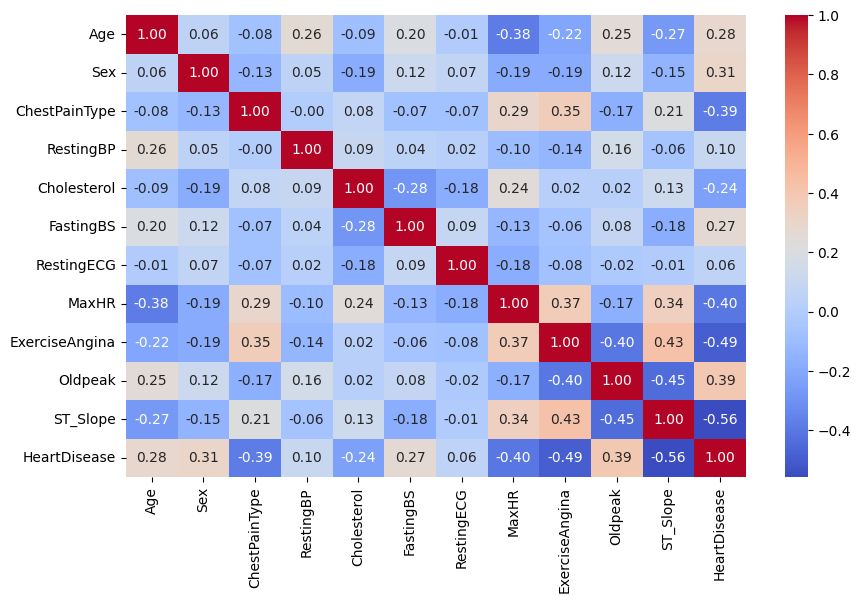

In [166]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

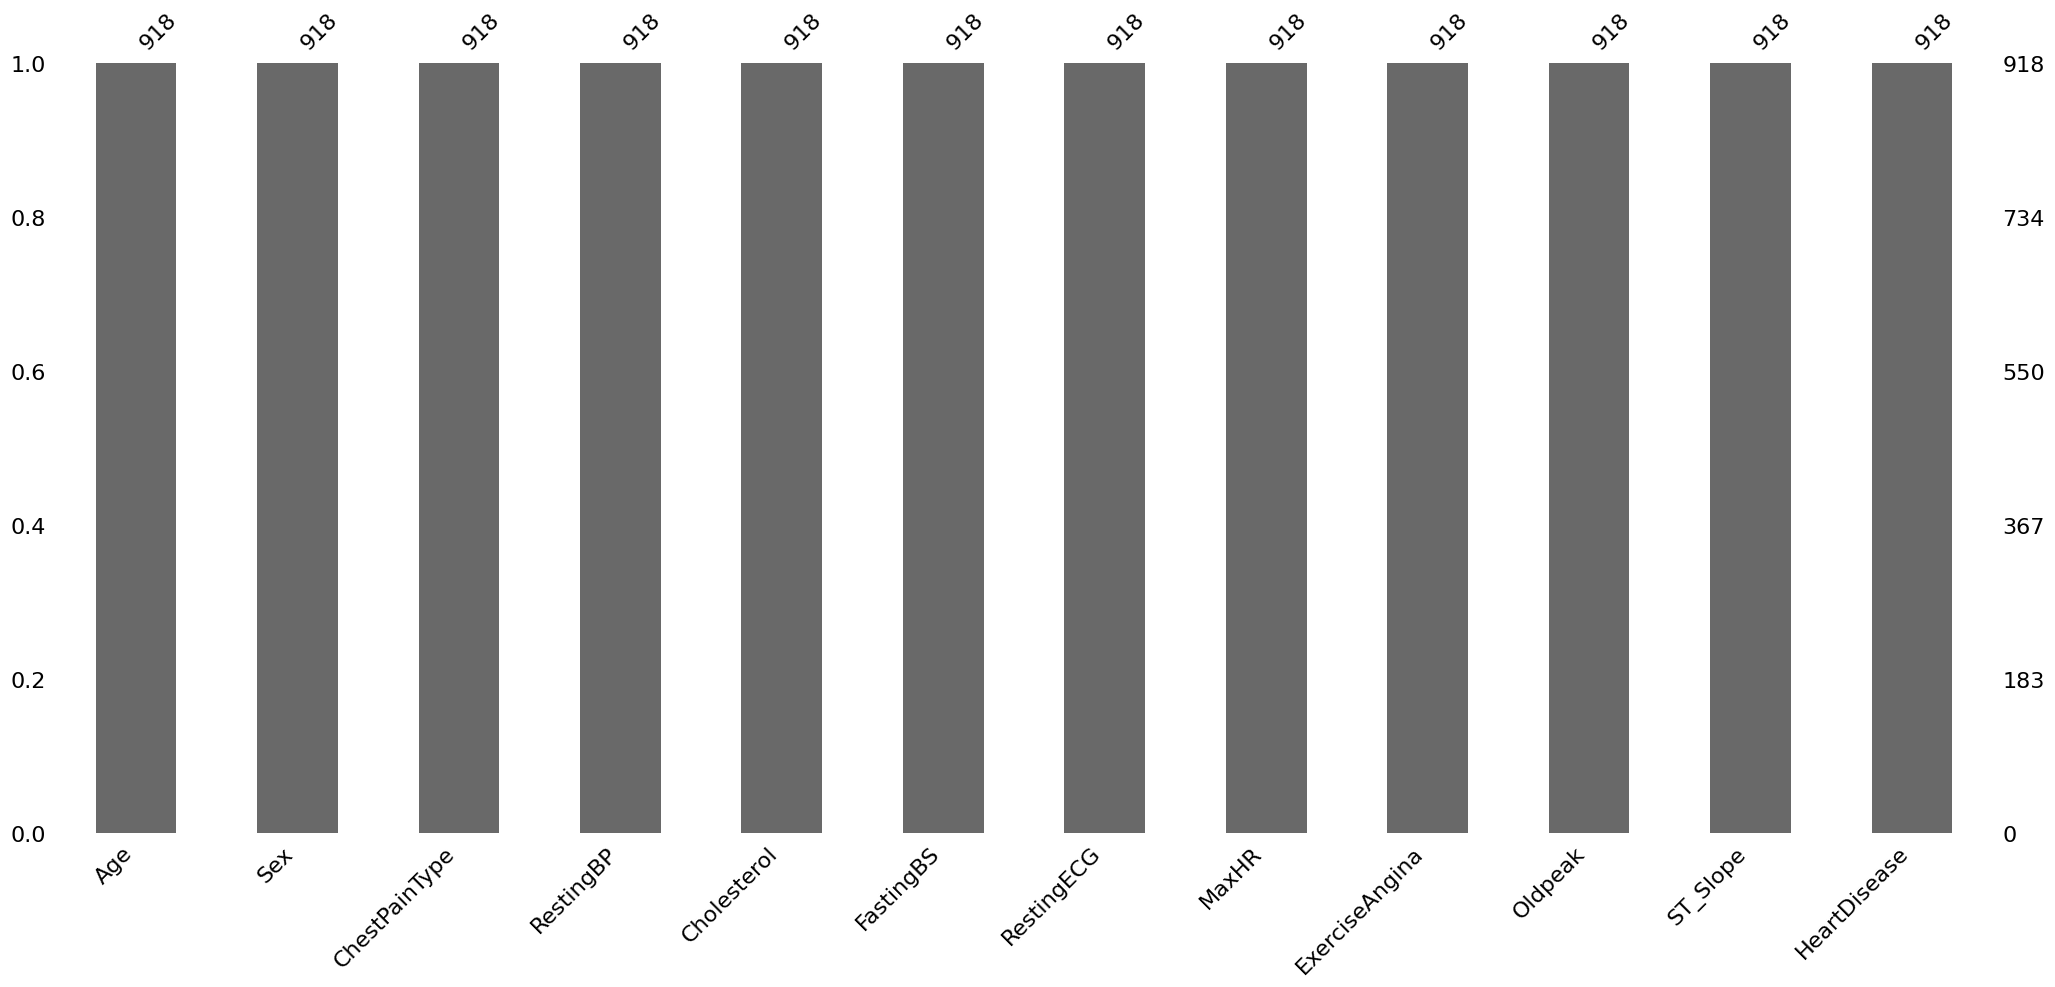

In [167]:
import missingno as msno
msno.bar(data)
plt.show()

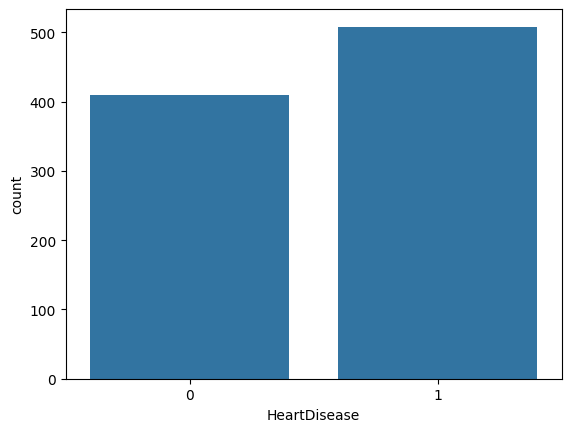

In [168]:
sns.countplot(x=data['HeartDisease'])
plt.show()

In [171]:
from sklearn.feature_selection import mutual_info_classif

X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

mi = mutual_info_classif(X, y)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_scores)

ST_Slope          0.219223
ChestPainType     0.136825
ExerciseAngina    0.127181
Oldpeak           0.100368
MaxHR             0.076370
Cholesterol       0.069895
FastingBS         0.059236
Sex               0.039283
Age               0.038411
RestingECG        0.008650
RestingBP         0.000000
dtype: float64


In [172]:
X = data.drop(columns=['HeartDisease'])
Y = data['HeartDisease']

In [173]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split( X , Y , test_size = .2 , random_state=42 )

In [174]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [175]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=100)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('SVM', SVC(probability=True)),  
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500))
]

voting_clf = VotingClassifier(estimators=models, voting='hard')
voting_clf.fit(x_train, y_train) 

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('Naive Bayes', GaussianNB()),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('Random Forest', RandomForestClassifier()),
                             ('Gradient Boosting',
                              GradientBoostingClassifier()),
                             ('Extra Trees', ExtraTreesClassifier()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVM', SVC(probability=True)),
                             ('XGBoost',
                              XGBCl...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('QDA', QuadraticDiscriminantAnalysis()),
                             ('MLP',
                              MLPClassifier(hidden_layer_sizes=(100, 50),
                                            max_iter=500))])

In [176]:
y_pred = voting_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.4f}")

Voting Classifier Accuracy: 0.8913


In [177]:
individual_results = {}
for name, model in models:
    model.fit(x_train, y_train)
    y_pred_individual = model.predict(x_test)
    individual_results[name] = accuracy_score(y_test, y_pred_individual)

for model_name, acc in individual_results.items():
    print(f"{model_name}: {acc:.4f}")

best_individual = max(individual_results, key=individual_results.get)
print(f"\nBest Individual Model: {best_individual} -> Accuracy: {individual_results[best_individual]:.4f}")
print(f"Voting Classifier Accuracy: {accuracy:.4f}")

Logistic Regression: 0.8533
Naive Bayes: 0.8424
Decision Tree: 0.7609
Random Forest: 0.8913
Gradient Boosting: 0.8641
Extra Trees: 0.8587
KNN: 0.7120
SVM: 0.6793
XGBoost: 0.8859
QDA: 0.8424
MLP: 0.8315

Best Individual Model: Random Forest -> Accuracy: 0.8913
Voting Classifier Accuracy: 0.8913


In [178]:
def load_model():
    global model
    try:
        with open("heart_model.pkl", "rb") as file:
            model = pickle.load(file)
    except FileNotFoundError:
        messagebox.showerror("Error", "Model file not found: heart_model.pkl")
        model = None
    except pickle.UnpicklingError:
        messagebox.showerror("Error", "Error loading the model. Ensure the file is a valid pickle file.")
        model = None

In [181]:
def convert_input(values):
    mapping = {
        "M": 1, "F": 0,
        "Y": 1, "N": 0,
        "TA": 0, "ATA": 1, "NAP": 2, "ASY": 3,
        "Normal": 0, "ST": 1, "LVH": 2,
        "Up": 0, "Flat": 1, "Down": 2
    }
    return [mapping.get(v, v) for v in values]

In [191]:
def predict():
    try:
        if model is None:
            messagebox.showerror("Error", "Model not loaded correctly.")
            return
        
        values = []
        for field, entry in entries.items():
            value = entry.get().strip()
            if not value:
                messagebox.showerror("Error", f"Please enter a value for {field}.")
                return
            try:
                values.append(float(value) if value.replace('.', '', 1).isdigit() else value)
            except ValueError:
                messagebox.showerror("Error", f"Invalid input for {field}. Please enter a valid value.")
                return
        
        values = np.array([convert_input(values)])
        if hasattr(model, 'predict_proba'):
            probability = model.predict_proba(values)[0][1] * 100
            result = "Heart Disease Detected" if probability > 50 else "Healthy"
            result_label.config(text=f"Diagnosis: {result} ({probability:.2f}% probability)", fg="red" if probability > 50 else "green")
        else:
            prediction = model.predict(values)[0]
            result = "Heart Disease Detected" if prediction == 1 else "Healthy"
            result_label.config(text=f"Diagnosis: {result}", fg="red" if prediction == 1 else "green")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

root = tk.Tk()
root.title("Heart Disease Prediction")
root.geometry("600x800")
root.configure(bg="#e0f7fa")

frame = tk.Frame(root, bg="#e0f7fa")
frame.pack(pady=20)

tk.Label(frame, text="Enter Patient Data", font=("Arial", 14, "bold"), bg="#e0f7fa").pack()

fields_options = {
    "Sex": ["M", "F"],
    "ChestPainType": ["TA", "ATA", "NAP", "ASY"],
    "FastingBS": ["1", "0"],
    "RestingECG": ["Normal", "ST", "LVH"],
    "ExerciseAngina": ["Y", "N"],
    "ST_Slope": ["Up", "Flat", "Down"]
}

numeric_fields = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
entries = {}

for field in numeric_fields + list(fields_options.keys()):
    tk.Label(frame, text=field, font=("Arial", 12), bg="#e0f7fa").pack()
    
    if field in fields_options:
        entry = ttk.Combobox(frame, values=fields_options[field], font=("Arial", 12), state="readonly")
        entry.current(0)  # تعيين القيمة الافتراضية
    else:
        entry = tk.Entry(frame, font=("Arial", 12))
    
    entry.pack()
    entries[field] = entry

tk.Button(root, text="Predict", command=predict, bg="green", fg="white", font=("Arial", 12, "bold"), padx=20, pady=5).pack(pady=10)
result_label = tk.Label(root, text="", font=("Arial", 14, "bold"), bg="#e0f7fa")
result_label.pack(pady=10)

load_model()
root.mainloop()